In [1]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sdf_helper as sh
%matplotlib inline

### Global Matplotlib Formatting

In [26]:
# LaTeX for plot labels
plt.rcParams['text.usetex'] = True

# Specify the LaTeX package for standard math fonts
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


plt.rcParams['xtick.labelsize'] = 20  # Example for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 20 

In [11]:
simulation = '/local_raid/honproj2/conan/sim_13_hall_2'
print(os.listdir())
os.chdir(simulation)

['Python reco starter.ipynb', 'changelog.txt', 'Getting Started with SDF Lare Files in Python.ipynb', 'LICENSE', 'Makefile', '.gitmodules', 'README.md', '.gitignore', 'Start.pro', '.DS_Store', 'rates_times_5_hall.csv', 'original_ratesl.csv', 'IDL', 'SDF', 'ExternalFiles', 'Manual', '.ipynb_checkpoints', 'src', 'obj', 'bin', 'Data', 'rates_times_13_hall.csv', 'original_rates.csv']


In [22]:
### Out-of-Plane Magnetic Field Plot

In [55]:
data_dir = 'Data'
def plot(d):
    data = sh.getdata(d,data_dir, verbose=False)
    t = data.Last_dump_time_requested.data
    g = data.Grid_Grid
    xb = g.data[0]
    yb = g.data[1]
    mag_field = data.Magnetic_Field_Bz.data
    print(np.shape(mag_field))
    fig, ax = plt.subplots(figsize=(10,6))
    X, Y = np.meshgrid(xb,yb,indexing='ij')
    #norm = mcolors.PowerNorm(gamma=0.5, vmin=0, vmax=600)

    pcm = plt.pcolormesh(X,Y,mag_field.data, cmap='magma')
    #pcm = plt.pcolormesh(X,-Y,current.data, cmap='magma')
    
    Bxc = data.Magnetic_Field_Bx_centred
    Byc = data.Magnetic_Field_By_centred
    g = data.Grid_Grid_mid
    xb = g.data[0]
    yb = g.data[1]
    X, Y = np.meshgrid( xc, yc)
    mfl = ax.streamplot(X, Y, np.transpose(Bxc.data), np.transpose(Byc.data), color = 'white', linewidth=1, density=2);
   
    # Plot the mirrored negative y values
    plt.xlabel(r'$x$', size=30)
    plt.ylabel(r'$z$', size=30)
    plt.ylim(-0.2,0.2)
    plt.xlim(-0.5, 0.5)

    
    fig.suptitle(f'Out-Of-Plane Magnetic Field'+r' $B_y$' + fr' at time $t=$ {np.round(t, 4)}', size=25, x = 0.44)
    #ax.set_aspect('equal')
    cbar = fig.colorbar(pcm)
    cbar.set_label(r'Current Density $J_y$', size=25, font='ariel')
    
    plt.show()
    return fig


(400, 400)


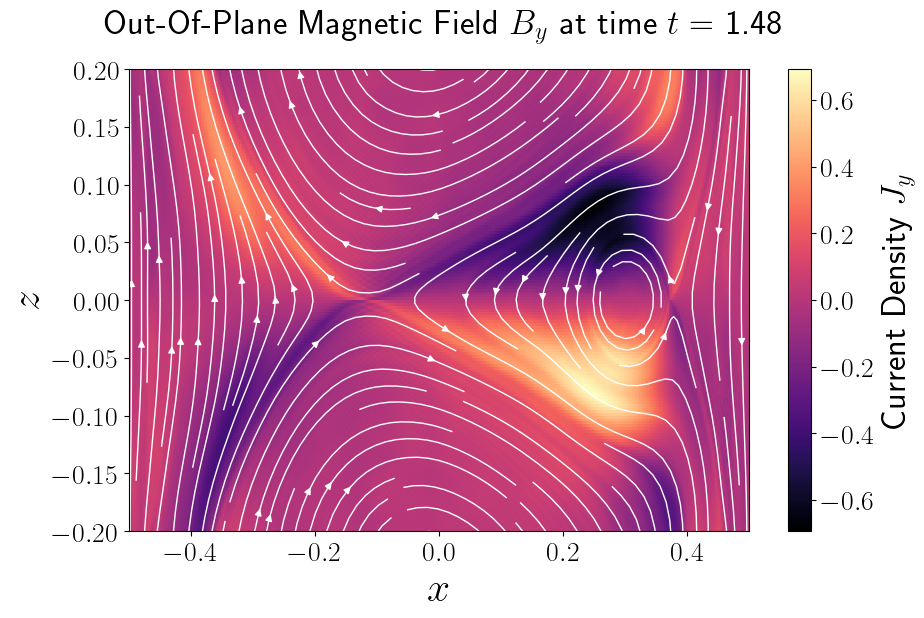

In [57]:
fig = plot(74)
fig.savefig('hall_quadrupolar_plasmoid.png')